# Health and Nutrition dataset - TB and Gross national Income
<br>
## Aim: 
Prediction of gross netto income (GNI) per capita using global health data (here only mortality and tuberculosis data) collected yearly from 1960 to 2015.<br>
## Hypothesis:
Infant nd child mortality will be a good indicator to predict GNI.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv("Tuberculosis.csv", encoding="ISO-8859-1")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4091.429697,4708.275460,5516.011131,5599.283158,5822.417372,6068.123505,7024.379798,7523.869885,7540.195551,7060.619946
1,Arab World,ARB,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,298.938663,295.215164,291.264570,286.359554,281.529220,276.840464,...,134.710070,132.587575,130.304302,128.074475,125.902926,123.818608,121.762916,120.239442,118.743278,NaN
3,Arab World,ARB,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,357.686935,353.231729,348.695368,343.990950,339.288363,334.610932,...,185.719202,183.039640,181.002368,179.094010,177.299627,175.477110,173.544634,171.445631,169.507345,NaN
4,Arab World,ARB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,159.950234,155.313614,152.233048,156.521984,152.166551,148.067800,...,36.906182,35.721235,34.527941,33.353477,32.281703,31.235308,30.333652,29.464477,28.684421,27.983485


## Exploring the data: Univariate

#### How many variables do I have? How many datapoints?

In [3]:
print('Countries:\n', df['Country Code'].unique())
print('Total number of countries:\n', len(df['Country Code'].unique()))
print('Variables:\n', df['Indicator Name'].unique())
print('Data from',df.columns[4], 'till',df.columns[len(df.columns)-1], 'was collected.')

Countries:
 ['ARB' 'CSS' 'CEB' 'EAR' 'EAS' 'EAP' 'TEA' 'EMU' 'ECS' 'ECA' 'TEC' 'EUU'
 'FCS' 'HPC' 'HIC' 'LTE' 'LCN' 'LAC' 'TLA' 'LDC' 'LMY' 'LIC' 'LMC' 'MEA'
 'MNA' 'TMN' 'MIC' 'NAC' 'OED' 'OSS' 'PSS' 'PST' 'PRE' 'SST' 'SAS' 'TSA'
 'SSF' 'SSA' 'TSS' 'UMC' 'WLD' 'AFG' 'ALB' 'DZA' 'ASM' 'ADO' 'AGO' 'ATG'
 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL'
 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA'
 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF' 'TCD' 'CHI' 'CHL' 'CHN' 'COL'
 'COM' 'ZAR' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI'
 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH' 'FRO' 'FJI' 'FIN'
 'FRA' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM'
 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN'
 'IRQ' 'IRL' 'IMY' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK'
 'KOR' 'KSV' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU'
 'LUX' 'MAC' 'MKD' 'MDG' 'MWI' 'MYS' 'M

#### How much data is missing?

In [4]:
#Make a dataframe
dfs = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
dfs = dfs.rename(index=str,columns={"variable": "Year"})

# how much data is missig
#Total number of data points
tdp= dfs[dfs['Indicator Name'] == df['Indicator Name'].unique()[0]]['Country Name'].count()
x=0
for i in df['Indicator Name'].unique():
    indi=df['Indicator Name'].unique()[x]
    print (indi)
    pdcomplete = (dfs[dfs['Indicator Name'] == indi]['value'].count())/tdp # This should only count cells that have data not nans
    print ('Percent complete data:', round(pdcomplete*100,2),"%")
    print()
    x=x+1

GNI per capita, Atlas method (current US$)
Percent complete data: 66.3 %

Incidence of tuberculosis (per 100,000 people)
Percent complete data: 38.91 %

Mortality rate, adult, female (per 1,000 female adults)
Percent complete data: 88.01 %

Mortality rate, adult, male (per 1,000 male adults)
Percent complete data: 88.01 %

Mortality rate, infant (per 1,000 live births)
Percent complete data: 80.52 %

Mortality rate, under-5 (per 1,000)
Percent complete data: 80.52 %

Prevalence of tuberculosis (per 100,000 population)
Percent complete data: 38.91 %

Tuberculosis case detection rate (all forms)
Percent complete data: 36.61 %

Tuberculosis death rate (per 100,000 people)
Percent complete data: 38.91 %

Tuberculosis treatment success rate (% of new cases)
Percent complete data: 25.94 %



In [5]:
# Remove nans
dfs = dfs.dropna()

#### Which variables are continuous and which are categorical?

In [6]:
print('Continous ratio variables:\n', df['Indicator Name'].unique(), " and year.")
print('Categorical variable:\n', 'Country')

Continous ratio variables:
 ['GNI per capita, Atlas method (current US$)'
 'Incidence of tuberculosis (per 100,000 people)'
 'Mortality rate, adult, female (per 1,000 female adults)'
 'Mortality rate, adult, male (per 1,000 male adults)'
 'Mortality rate, infant (per 1,000 live births)'
 'Mortality rate, under-5 (per 1,000)'
 'Prevalence of tuberculosis (per 100,000 population)'
 'Tuberculosis case detection rate (all forms)'
 'Tuberculosis death rate (per 100,000 people)'
 'Tuberculosis treatment success rate (% of new cases)']  and year.
Categorical variable:
 Country


#### Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?

In [7]:
print('Distributions used:')
print('GNI: Generalized lognormal or pareto')
print('Incidence: binomial,poisson or exponential')
print('Mortality rates: negative binomial distribution and its continuous analog, the gamma distribution, show instability under right-censoring... distribution derived from the Richards generalization of the von Bertalanffy function')
#https://academic.oup.com/forestscience/article-abstract/31/2/331/4656994?redirectedFrom=PDF
print('Prevalene of disease, case detection rate, success rate: Unknown')

Distributions used:
GNI: Generalized lognormal or pareto
Incidence: binomial,poisson or exponential
Mortality rates: negative binomial distribution and its continuous analog, the gamma distribution, show instability under right-censoring... distribution derived from the Richards generalization of the von Bertalanffy function
Prevalene of disease, case detection rate, success rate: Unknown


#### How much variance is there in each of my variables? 

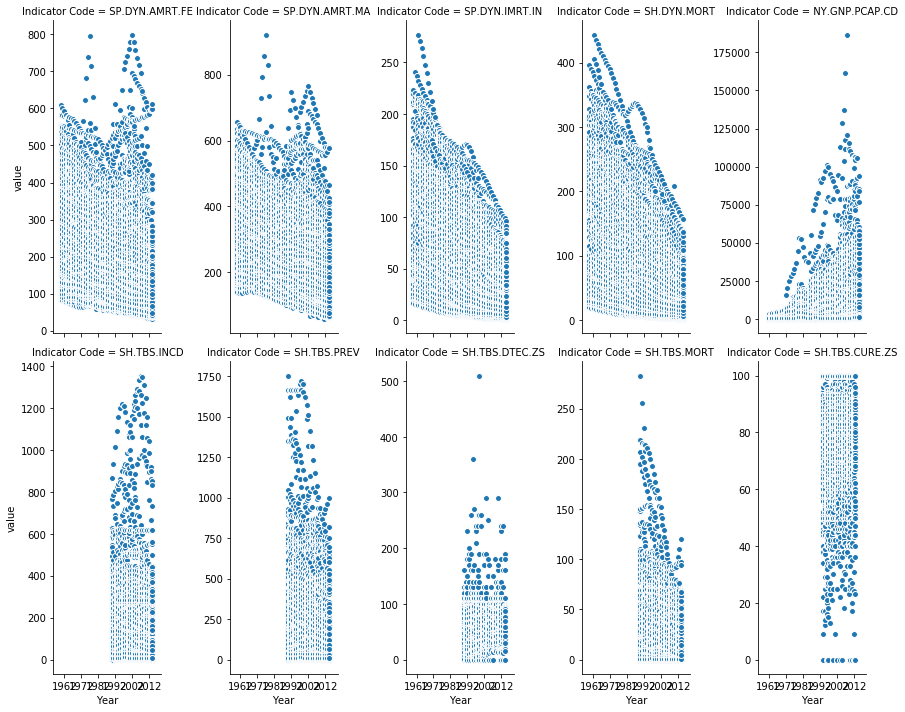

In [8]:
# Plot each variable avearged over countries over time
dfs['Year'] = pd.to_datetime(dfs['Year'])
g = sns.FacetGrid(dfs, col="Indicator Code",sharey=False,sharex=True, col_wrap=5, size=5, aspect=.5)
g = (g.map(plt.scatter, "Year", "value", edgecolor="w"))

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


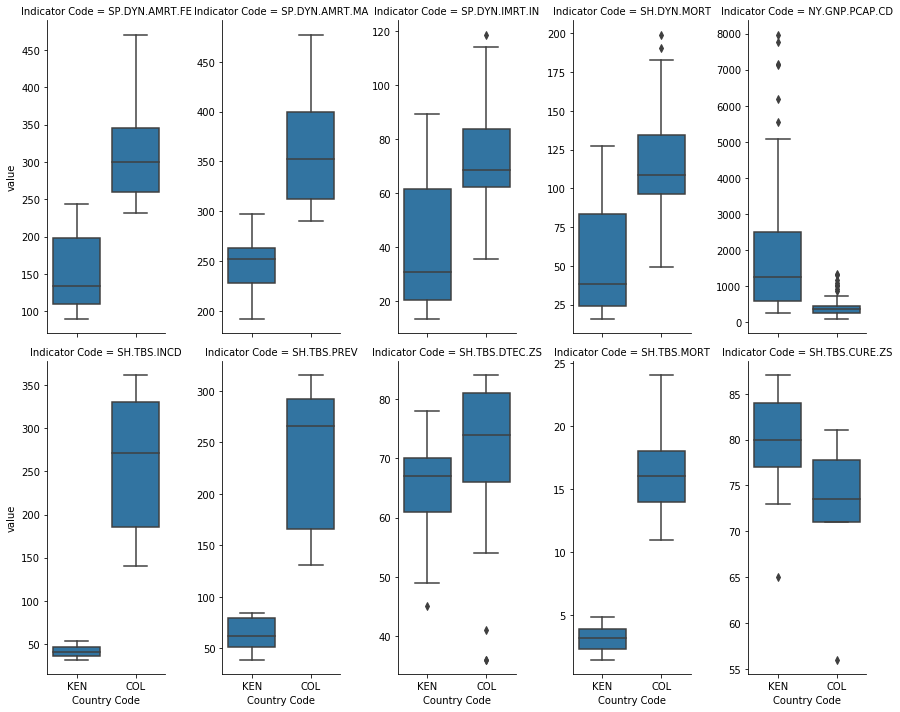

In [9]:
#Does my hypothesis hold true?
#Variance per country over year
dfs_ColKen = dfs.loc[((dfs['Country Code'] == 'COL') | (dfs['Country Code'] == 'KEN'))]#, ['Country Name','Indicator','Indicator Name','value']]
dfs_ColKen.head()

g = sns.FacetGrid(dfs_ColKen, col="Indicator Code", sharey=False, col_wrap=5, size=5, aspect=.5)
g = g.map(sns.boxplot,"Country Code", "value")
plt.show()

## Exploring the data: Bivariate

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


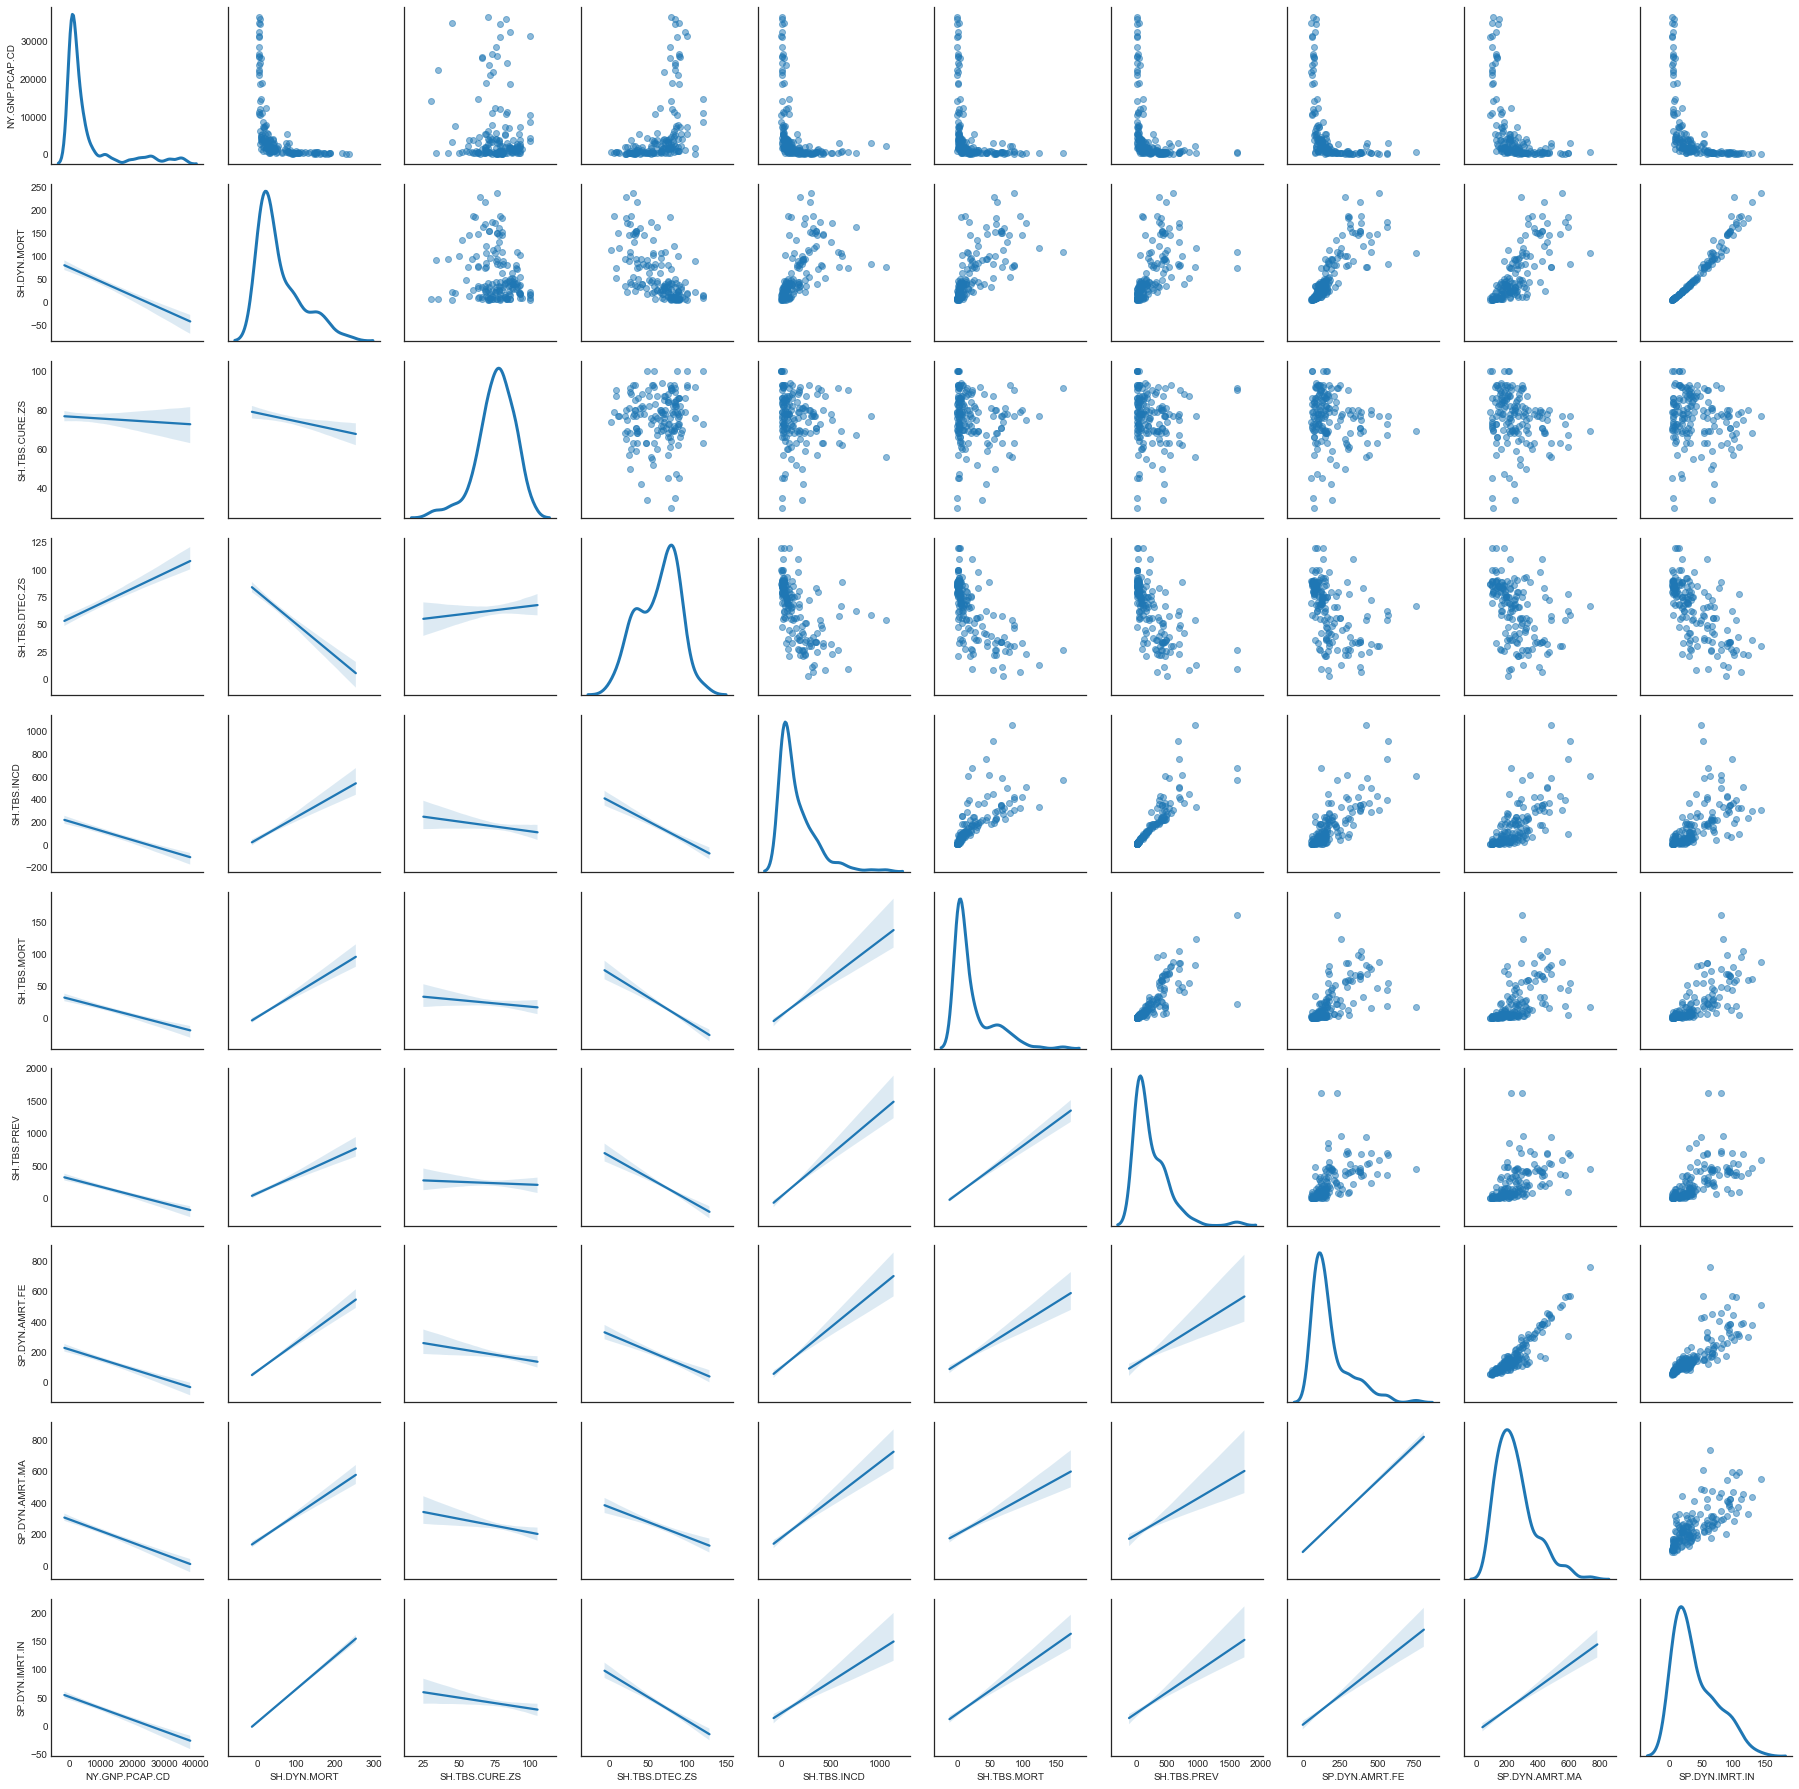

In [10]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Choose on Year and all Countries to see correlation between data
dfs_2000 = dfs.loc[(dfs['Year'] == '2000')]

# cast the variables out
PV = dfs_2000.pivot(index='Country Code', columns='Indicator Code', values= 'value')
#print(PV.head())

# Make a scatterplot matrix.
g = sns.PairGrid(PV.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

## Features Engineering

In [11]:
# Scales features to normality
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def Scale_feature(DM):
    cols = DM.columns
    cols_sc =['sc_' + name for name in cols]
    DMa = np.array(DM)
    scaler = StandardScaler()
    scaler.fit(DMa)
    StandardScaler(copy=True, with_mean=True, with_std=True)
    sc_DM = scaler.transform(DMa) # Use scaler.transform later on for the test data set 
    dc_DM_df = pd.DataFrame(sc_DM, index=DM.index, columns=cols_sc)# Make a data frame with old annotations
    return dc_DM_df

In [12]:
# Casting the dataframe 
cdf = dfs.groupby(['Country Code', 'Year', 'Indicator Code'])['value'].sum().unstack('Indicator Code')
#print('cdf',cdf.head())
cdf = cdf.dropna()
#Adding reversed variables
cdf['TB_notdetected']= 100-cdf['SH.TBS.DTEC.ZS']
cdf['TB_notcured']= 100-cdf['SH.TBS.CURE.ZS']
cdf['IN_survival']= 1000 - cdf['SP.DYN.IMRT.IN']
cdf['Child_survival']= 1000 - cdf['SH.DYN.MORT']

#Generating normal distributions
Features= pd.DataFrame()
Features = Scale_feature(cdf)

#Features['GNI'] = cdf['NY.GNP.PCAP.CD']
Features['log_GNI']=np.log(cdf['NY.GNP.PCAP.CD'])
Features['log_SH.DYN.MORT']=np.log(cdf['SH.DYN.MORT'])
Features['log_SP.DYN.AMRT.FE']=np.log(cdf['SP.DYN.AMRT.FE'])
Features['log_SP.DYN.AMRT.MA']=np.log(cdf['SP.DYN.AMRT.MA'])
Features['log_SP.DYN.IMRT.IN']=np.log(cdf['SP.DYN.IMRT.IN'])

#Combining features
#Combining TB features
Features['TB_INC_MORT_PREV_sc']=Features[['sc_SH.TBS.INCD','sc_SH.TBS.MORT','sc_SH.TBS.PREV']].mean(axis=1)
#Combining adult and child mortality features
Features['POP_MORT_sc']=Features[['sc_SP.DYN.AMRT.FE','sc_SP.DYN.AMRT.MA','sc_SP.DYN.IMRT.IN', 'sc_SH.DYN.MORT']].mean(axis=1)
#Combining child and infant mortality features
Features['KID_MORT']=Features[['sc_SP.DYN.IMRT.IN', 'sc_SH.DYN.MORT']].mean(axis=1)
Features['KID_SURV']=Features[['sc_IN_survival', 'sc_Child_survival']].mean(axis=1)

# Combining feature features
Features['TB_ALL']=Features[['TB_INC_MORT_PREV_sc','sc_TB_notdetected','sc_TB_notcured']].mean(axis=1)

print(Features.head())

                         sc_NY.GNP.PCAP.CD  sc_SH.DYN.MORT  sc_SH.TBS.CURE.ZS  \
Country Code Year                                                               
AFG          2004-01-01          -0.586451        1.397171           0.901697   
             2005-01-01          -0.584037        1.325997           0.970788   
             2006-01-01          -0.581624        1.260754           0.556245   
             2007-01-01          -0.576797        1.199465           0.763516   
             2008-01-01          -0.574384        1.144107           0.832607   

                         sc_SH.TBS.DTEC.ZS  sc_SH.TBS.INCD  sc_SH.TBS.MORT  \
Country Code Year                                                            
AFG          2004-01-01          -1.065257        0.162189        1.019378   
             2005-01-01          -0.806989        0.162189        0.875157   
             2006-01-01          -0.505677        0.162189        0.803047   
             2007-01-01          -0.290454

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [5.92078218e-01 1.43222399e-01 8.17479035e-02 7.88023241e-02
 5.15390444e-02 3.11635218e-02 1.12740787e-02 5.88925486e-03
 2.82909142e-03 1.45416447e-03 3.92145048e-32 1.93869010e-32
 3.97282724e-33 2.53450922e-33]


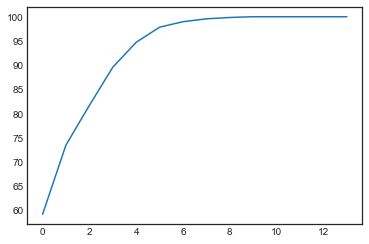

In [13]:
# Select principal components that describe the data best
from matplotlib.mlab import PCA as mlabPCA
from sklearn.decomposition import PCA 

# Normalize the data so that all variables have a mean of 0 and standard deviation
X = StandardScaler().fit_transform(cdf)

# Transform X into Y.
sklearn_pca = PCA(n_components=X.shape[1])# X.shape[1] = number of columns
#From a couple of cells above
Y_sklearn = sklearn_pca.fit_transform(X) # Makes the whole PCA # Why do we have do to fit_transform twice??
#print(Y_sklearn)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

var1=np.cumsum(np.round(sklearn_pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)

In [14]:
# looking at the above plot I chose to continue with 6 principal components
pca_f = PCA(n_components=6)
pca_f_sklearn = pca_f.fit_transform(X)

PCA_Features = pd.DataFrame(pca_f_sklearn, index=cdf.index, columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6'])

## Feature selection

#### 1. Using correlation

                     NY.GNP.PCAP.CD  sc_NY.GNP.PCAP.CD   log_GNI
log_SH.DYN.MORT           -0.695101          -0.695101 -0.877989
log_SP.DYN.IMRT.IN        -0.719453          -0.719453 -0.877575
sc_SP.DYN.IMRT.IN         -0.505598          -0.505598 -0.804715
SP.DYN.IMRT.IN            -0.505598          -0.505598 -0.804715
pca_1                     -0.556451          -0.556451 -0.799634
KID_MORT                  -0.483148          -0.483148 -0.789641
log_SP.DYN.AMRT.FE        -0.599006          -0.599006 -0.782120
POP_MORT_sc               -0.508246          -0.508246 -0.771401
sc_SH.DYN.MORT            -0.457303          -0.457303 -0.769020
SH.DYN.MORT               -0.457303          -0.457303 -0.769020
log_SP.DYN.AMRT.MA        -0.642468          -0.642468 -0.741571
sc_SP.DYN.AMRT.MA         -0.506345          -0.506345 -0.660823
SP.DYN.AMRT.MA            -0.506345          -0.506345 -0.660823
SP.DYN.AMRT.FE            -0.432083          -0.432083 -0.651225
sc_SP.DYN.AMRT.FE        

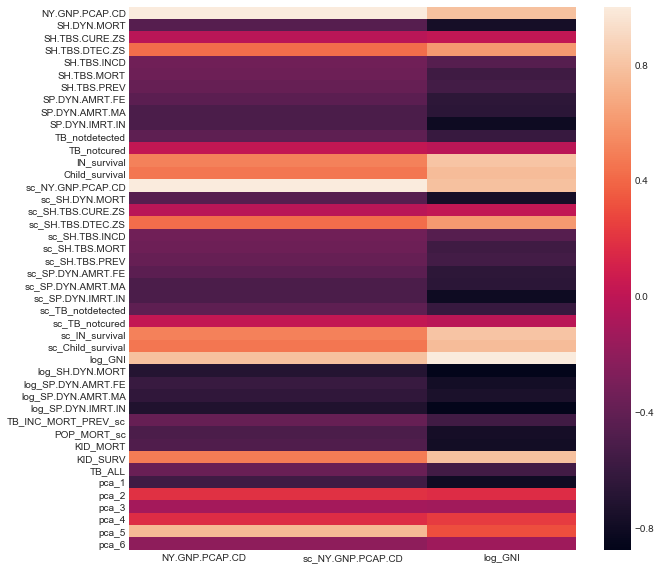

In [24]:
#Combine data with features and pca features
Alldata = pd.concat([cdf, Features, PCA_Features], axis=1, sort=False)

# See which features correlate best with GNI variables
CorrMa = Alldata.corr(method='pearson')
print(CorrMa[['NY.GNP.PCAP.CD','sc_NY.GNP.PCAP.CD','log_GNI']].sort_values(by=['log_GNI']))
#print(CorrMa[['NY.GNP.PCAP.CD','sc_NY.GNP.PCAP.CD','log_GNI']].sort_values(by=['log_GNI']).tail(5))

plt.figure(figsize=(10,10))
sns.heatmap(CorrMa[['NY.GNP.PCAP.CD','sc_NY.GNP.PCAP.CD','log_GNI']])

# plotting the correlation between the variables and the generated feature
# increase plot and not decrease font size font_scale=1.5
plt.show()

In [21]:
# Best Features by correlation are:
CorrMa['log_GNI_ABS']=abs(CorrMa['log_GNI'])
#CorrMa[['log_GNI','log_GNI_ABS']].head()
CorrMaSorted=CorrMa.sort_values(by=['log_GNI_ABS'], ascending=False)
print (CorrMaSorted['log_GNI_ABS'].head(10))

log_GNI               1.000000
log_SH.DYN.MORT       0.877989
log_SP.DYN.IMRT.IN    0.877575
sc_IN_survival        0.804715
sc_SP.DYN.IMRT.IN     0.804715
IN_survival           0.804715
SP.DYN.IMRT.IN        0.804715
pca_1                 0.799634
KID_SURV              0.789641
KID_MORT              0.789641
Name: log_GNI_ABS, dtype: float64
